In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/8pnfe5bnbe9jglt/JobChangeofDataScientists.csv?dl=1")

# Exploratory Data Analysis

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [5]:
df.drop("enrollee_id", axis=1, inplace=True)

In [6]:
df.shape

(19158, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


# Cleaning the Data

In [9]:
df.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
num_cols = df.select_dtypes(["float64","int64"])
cat_cols = df.select_dtypes(["object"])

for col in num_cols.columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols.columns:
    df[col].fillna(df[col].mode().values[0], inplace=True)

In [11]:
df.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Handling Duplicates

In [12]:
df.duplicated().sum()

97

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
X = df.drop("target", axis=1)
y = df["target"]

y = pd.DataFrame(y, columns=["target"])

# Data Standardization

In [15]:
X_num_cols  = X.select_dtypes(["float64","int64"])
X_cat_cols  = X.select_dtypes(["object"])

ss = StandardScaler()
X[X_num_cols.columns] = ss.fit_transform(X[X_num_cols.columns])

# One Hot Encoding

In [16]:
X = pd.get_dummies(X, columns=X_cat_cols.columns)

# Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [18]:
models = pd.DataFrame(columns=["Models","Accuracy Score"])

In [19]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(predictions, y_test)
print("LogisticRegression: ", score)

new_row = {"Models": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

LogisticRegression:  0.7718332022029898


In [20]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
score = accuracy_score(predictions, y_test)
print("GaussianNB: ", score)

new_row = {"Models": "GaussianNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

GaussianNB:  0.3884080776291634


In [21]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions = BNB.predict(X_test)
score = accuracy_score(predictions, y_test)
print("BernoulliNB: ", score)

new_row = {"Models": "BernoulliNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

BernoulliNB:  0.7555730396013638


In [22]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = accuracy_score(predictions, y_test)
print("SVC: ", score)

new_row = {"Models": "SVC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

SVC:  0.7718332022029898


In [23]:
randomforest = RandomForestClassifier(n_estimators=1000, random_state=42)
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_test)
score = accuracy_score(predictions, y_test)
print("RandomForestClassifier: ", score)

new_row = {"Models": "RandomForestClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

RandomForestClassifier:  0.7574088644112248


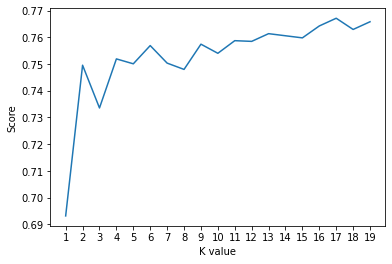

In [25]:
score_list = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    score_list.append(accuracy_score(y_test, predictions))

plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(predictions, y_test)
print("KNeighborsClassifier: ", score)

new_row = {"Models": "KNeighborsClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

KNeighborsClassifier:  0.7671125098347757


# Comparison of Machine Learning Models

In [27]:
models.sort_values(by="Accuracy Score", ascending=False)

,Models,Accuracy Score
0,LogisticRegression,0.771833
3,SVC,0.771833
5,KNeighborsClassifier,0.767113
4,RandomForestClassifier,0.757409
2,BernoulliNB,0.755573
1,GaussianNB,0.388408
